In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df=pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.shape

(550068, 12)

In [5]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

Check the null values

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Check the duplicate values

In [7]:
df.duplicated().sum()

0

Drop unnecessary columns

In [8]:
df.drop(columns=['User_ID','Product_ID','Product_Category_3'],inplace=True)

In [9]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


Rename columns

In [10]:
df.rename(columns = {'City_Category':'City', 'Stay_In_Current_City_Years':'Years_in_City'}, inplace = True)

In [11]:
df.head()

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


Categorizing Columns

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age']=df['Age'].map({'0-17':'Child', '55+':'Old', '26-35':'Adult', '46-50':'Adult', '51-55':"Old", '36-45':"Adult", '18-25':"Teenage"})

In [14]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,Child,10,A,2,0,3,NaN,8370
1,F,Child,10,A,2,0,1,6.0,15200
2,F,Child,10,A,2,0,12,NaN,1422
3,F,Child,10,A,2,0,12,14.0,1057
4,M,Old,16,C,4+,0,8,NaN,7969
5,M,Adult,15,A,3,0,1,2.0,15227
6,M,Adult,7,B,2,1,1,8.0,19215
7,M,Adult,7,B,2,1,1,15.0,15854
8,M,Adult,7,B,2,1,1,16.0,15686
9,M,Adult,20,A,1,1,8,NaN,7871


Converting categorical data into integer data using map ("Gender")

In [15]:
df['Gender']=df['Gender'].map({'M':0,'F':1})

In [16]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,NaN,8370
1,1,Child,10,A,2,0,1,6.0,15200
2,1,Child,10,A,2,0,12,NaN,1422
3,1,Child,10,A,2,0,12,14.0,1057
4,0,Old,16,C,4+,0,8,NaN,7969
5,0,Adult,15,A,3,0,1,2.0,15227
6,0,Adult,7,B,2,1,1,8.0,19215
7,0,Adult,7,B,2,1,1,15.0,15854
8,0,Adult,7,B,2,1,1,16.0,15686
9,0,Adult,20,A,1,1,8,NaN,7871


Filling nan vlaues in product_category_2

In [17]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [18]:
s=df.groupby('Age')['Product_Category_2'].agg(pd.Series.mode)
s

Age
Adult      8.0
Child      4.0
Old        8.0
Teenage    8.0
Name: Product_Category_2, dtype: float64

In [19]:
for key in s.index:
    df.loc[(df['Age']==key) & (df['Product_Category_2'].isnull()), 'Product_Category_2']=s[key]

In [20]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,4.0,8370
1,1,Child,10,A,2,0,1,6.0,15200
2,1,Child,10,A,2,0,12,4.0,1422
3,1,Child,10,A,2,0,12,14.0,1057
4,0,Old,16,C,4+,0,8,8.0,7969
5,0,Adult,15,A,3,0,1,2.0,15227
6,0,Adult,7,B,2,1,1,8.0,19215
7,0,Adult,7,B,2,1,1,15.0,15854
8,0,Adult,7,B,2,1,1,16.0,15686
9,0,Adult,20,A,1,1,8,8.0,7871


In [21]:
df['Product_Category_2'].isnull().sum()

0

Removing symbol '+' from column "years in city" 

In [22]:
df['Years_in_City'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
df['Years_in_City'] = df['Years_in_City'].astype(str).str.replace('+', '')
df['Years_in_City'] = df['Years_in_City'].astype(int)

In [24]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,4.0,8370
1,1,Child,10,A,2,0,1,6.0,15200
2,1,Child,10,A,2,0,12,4.0,1422
3,1,Child,10,A,2,0,12,14.0,1057
4,0,Old,16,C,4,0,8,8.0,7969
5,0,Adult,15,A,3,0,1,2.0,15227
6,0,Adult,7,B,2,1,1,8.0,19215
7,0,Adult,7,B,2,1,1,15.0,15854
8,0,Adult,7,B,2,1,1,16.0,15686
9,0,Adult,20,A,1,1,8,8.0,7871


Converting value to integer type in column "Product_Category_2"

In [25]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,4,8370
1,1,Child,10,A,2,0,1,6,15200
2,1,Child,10,A,2,0,12,4,1422
3,1,Child,10,A,2,0,12,14,1057
4,0,Old,16,C,4,0,8,8,7969
5,0,Adult,15,A,3,0,1,2,15227
6,0,Adult,7,B,2,1,1,8,19215
7,0,Adult,7,B,2,1,1,15,15854
8,0,Adult,7,B,2,1,1,16,15686
9,0,Adult,20,A,1,1,8,8,7871


In [26]:
df.isnull().sum()

Gender                0
Age                   0
Occupation            0
City                  0
Years_in_City         0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Purchase              0
dtype: int64

In [27]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,4,8370
1,1,Child,10,A,2,0,1,6,15200
2,1,Child,10,A,2,0,12,4,1422
3,1,Child,10,A,2,0,12,14,1057
4,0,Old,16,C,4,0,8,8,7969
5,0,Adult,15,A,3,0,1,2,15227
6,0,Adult,7,B,2,1,1,8,19215
7,0,Adult,7,B,2,1,1,15,15854
8,0,Adult,7,B,2,1,1,16,15686
9,0,Adult,20,A,1,1,8,8,7871


Data Visualization

In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Age VS Purchase')

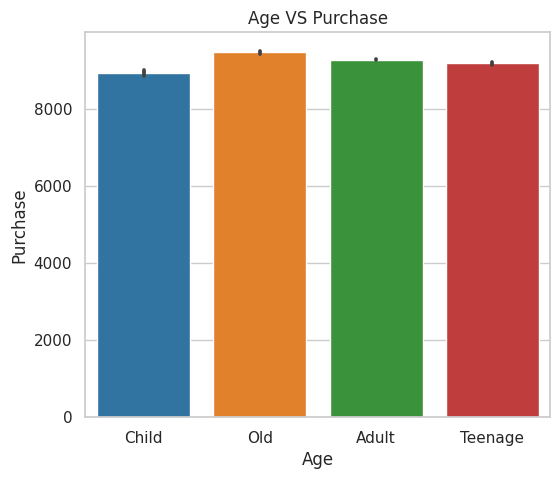

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (6,5))
s=sns.barplot(x='Age',y='Purchase',data=df,palette='tab10')
s.set_title("Age VS Purchase")

Text(0.5, 1.0, 'Age VS Purchase')

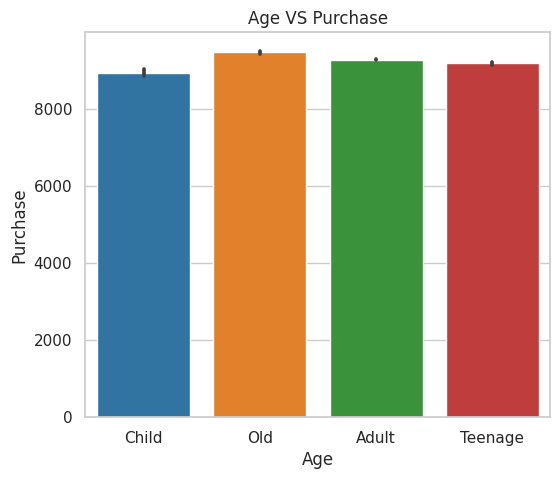

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (6,5))
s=sns.barplot(x='Age',y='Purchase',data=df,palette='tab10')
s.set_title("Age VS Purchase")

Text(0.5, 1.0, 'occupation VS Purchase')

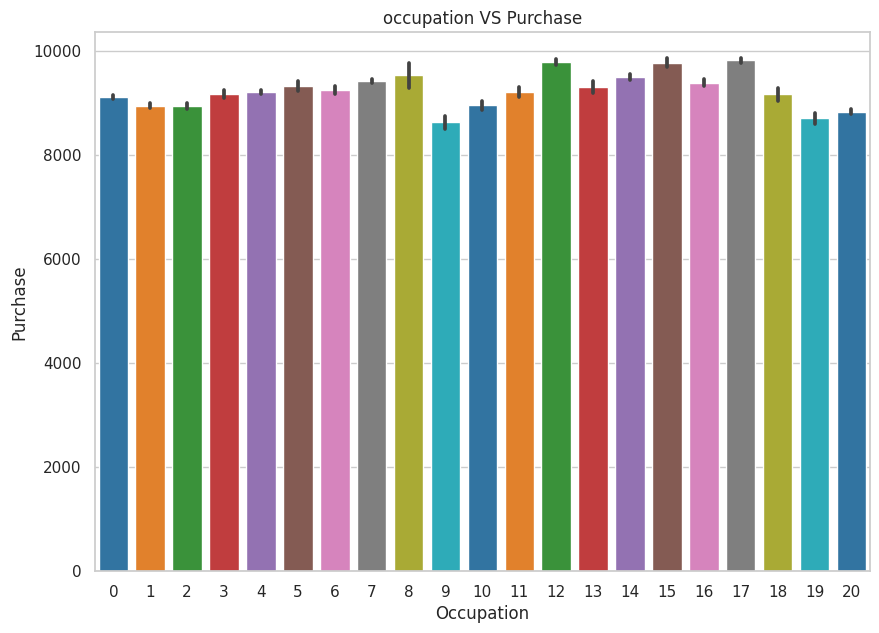

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (10,7))
s=sns.barplot(x='Occupation',y='Purchase',data=df,palette='tab10')
s.set_title("occupation VS Purchase")

<Axes: title={'center': 'City vs Purchase'}, xlabel='City', ylabel='Purchase'>

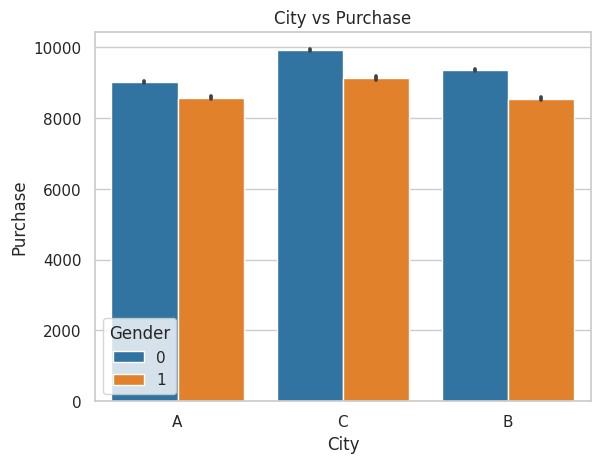

In [32]:
plt.title('City vs Purchase')
sns.barplot(data=df,x='City',y='Purchase',hue='Gender',palette='tab10')

<Axes: title={'center': 'product1 vs purchase'}, xlabel='Product_Category_1', ylabel='Purchase'>

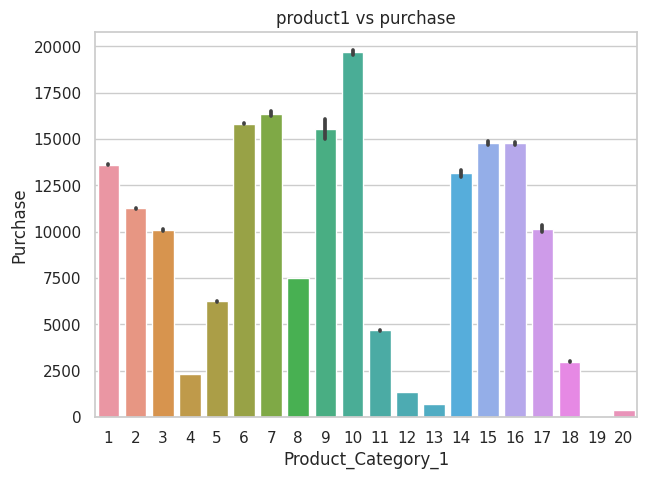

In [33]:
plt.figure(figsize=(7,5))
plt.title('product1 vs purchase')
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

<Axes: title={'center': 'product2 vs purchase'}, xlabel='Product_Category_2', ylabel='Purchase'>

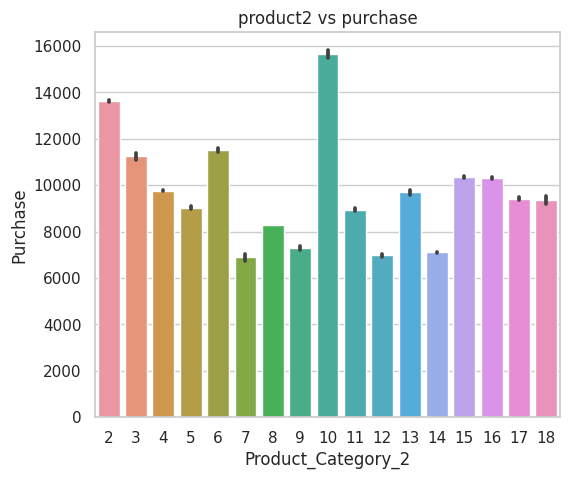

In [34]:
plt.figure(figsize=(6,5))
plt.title('product2 vs purchase')
sns.barplot(x='Product_Category_2',y='Purchase',data=df)

City category

In [35]:
d1=df['City'].value_counts()
d1

City
B    231173
C    171175
A    147720
Name: count, dtype: int64

<Axes: ylabel='count'>

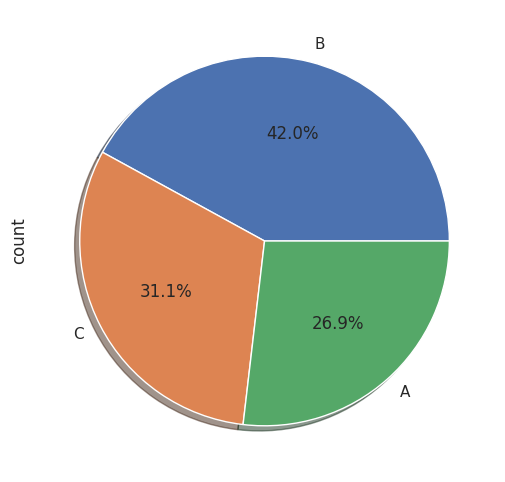

In [36]:
d1.plot(kind='pie',autopct='%.1f%%',figsize=(6,6),shadow=True)

In [37]:
df.head(10)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,4,8370
1,1,Child,10,A,2,0,1,6,15200
2,1,Child,10,A,2,0,12,4,1422
3,1,Child,10,A,2,0,12,14,1057
4,0,Old,16,C,4,0,8,8,7969
5,0,Adult,15,A,3,0,1,2,15227
6,0,Adult,7,B,2,1,1,8,19215
7,0,Adult,7,B,2,1,1,15,15854
8,0,Adult,7,B,2,1,1,16,15686
9,0,Adult,20,A,1,1,8,8,7871


Text(0.5, 1.0, 'Gender')

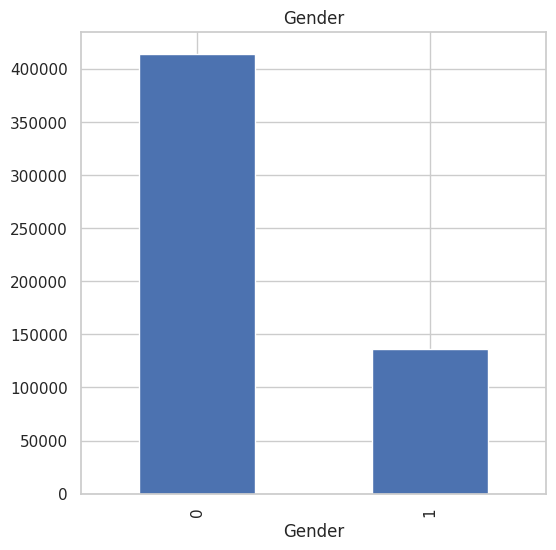

In [38]:
df["Gender"].value_counts().plot(kind='bar',figsize=(6,6))
plt.title('Gender')

Visualize individual column

Text(0.5, 1.0, 'Years_in_City')

<Figure size 640x480 with 0 Axes>

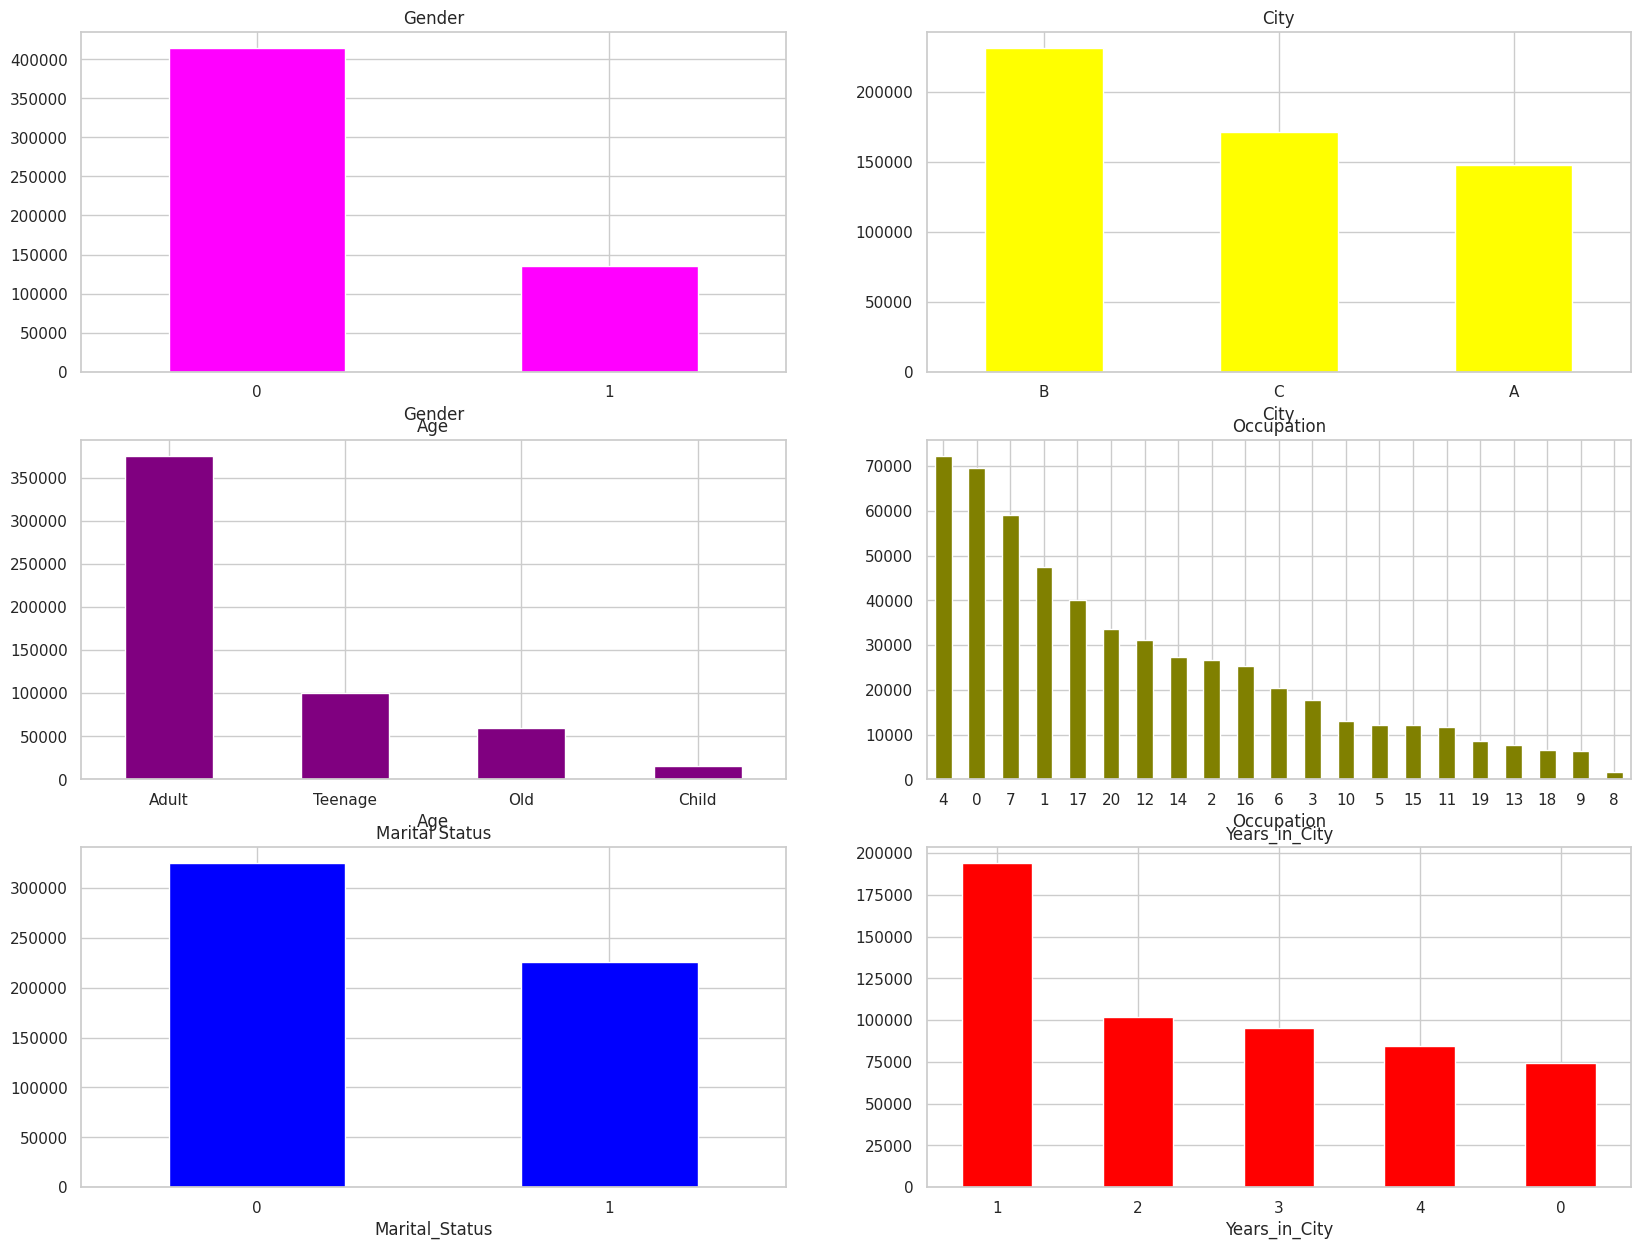

In [39]:
plt.figure(1)
plt.figure(figsize=(20,15))

plt.subplot(321)
df['Gender'].value_counts().plot(kind='bar',color='magenta',rot=0)
plt.title('Gender')

plt.subplot(322)
df['City'].value_counts().plot(kind='bar',color='yellow',rot=0)
plt.title('City')

plt.subplot(323)
df['Age'].value_counts().plot(kind='bar',color='purple',rot=0)
plt.title('Age')

plt.subplot(324)
df['Occupation'].value_counts().plot(kind='bar',color="olive",rot=0)
plt.title('Occupation')

plt.subplot(325)
df['Marital_Status'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Marital Status')

plt.subplot(326)
df['Years_in_City'].value_counts().plot(kind='bar',color='red',rot=0)
plt.title('Years_in_City')

Marital Status vs Purchase

<Axes: title={'center': 'marital status vs purchase'}, xlabel='Marital_Status', ylabel='Purchase'>

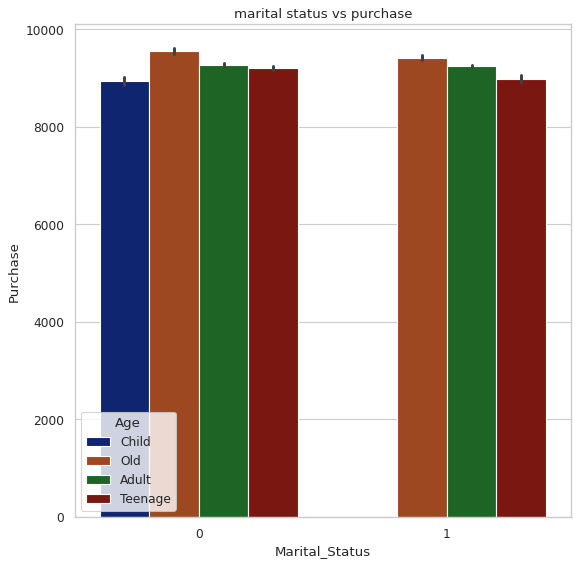

In [40]:
plt.figure(figsize=(8,8),dpi=80)
plt.title('marital status vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=df,palette='dark',hue='Age')

Text(0.5, 1.0, 'Product_Category_2')

<Figure size 640x480 with 0 Axes>

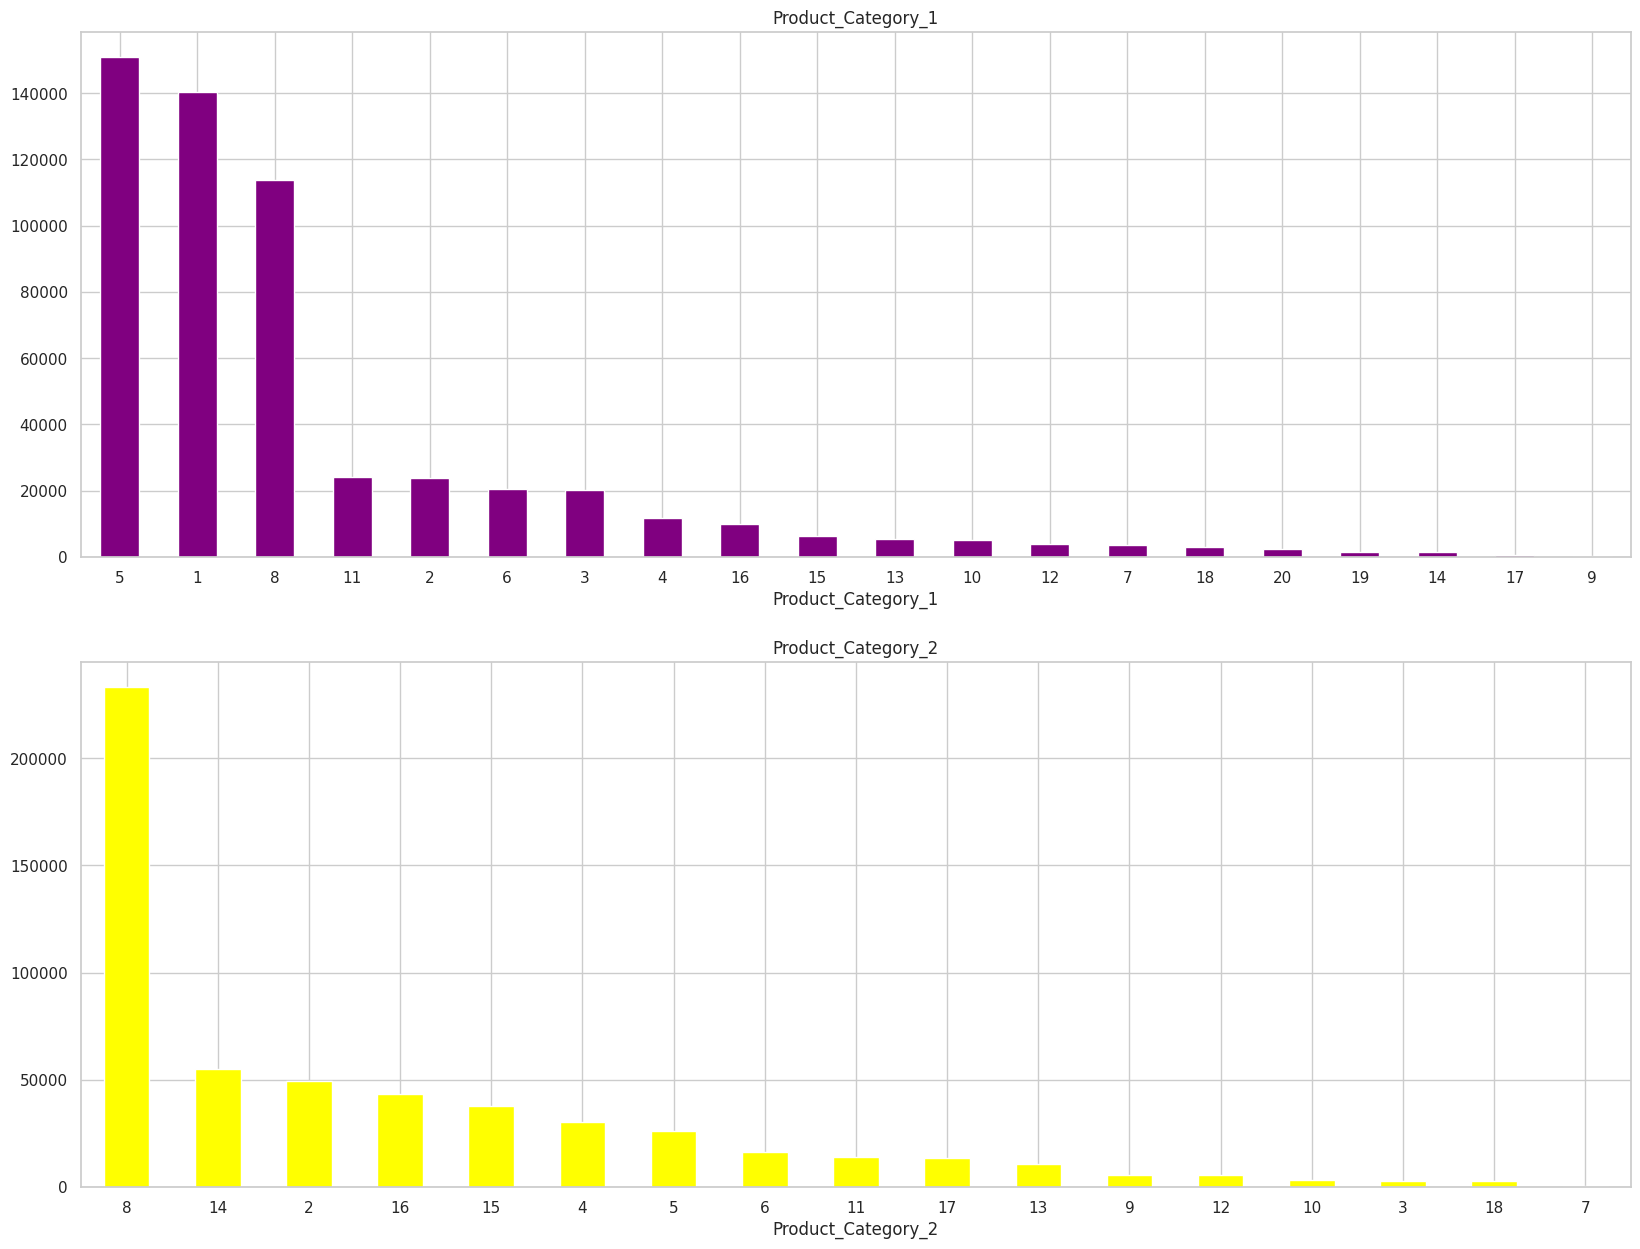

In [41]:
plt.figure(1)
plt.figure(figsize=(20,15))

plt.subplot(211)
df['Product_Category_1'].value_counts().plot(kind='bar',color='purple',rot=0)
plt.title('Product_Category_1')

plt.subplot(212)
df['Product_Category_2'].value_counts().plot(kind='bar',color='yellow',rot=0)
plt.title('Product_Category_2')

